In [1]:
import pandas as pd
import os


Quick Notes to be aware of. 
- playerID is the primary key
- names and birthdays are linked to playerID in master table
- data is historical from 1871-2015 with no updates since then

Main Goal of this data is to analyze and look at the evolution of Baseball's offense and pitching and compare how some of my favorite players predicted vs actual stats after 2015.

With a larger database and not a single table data set, I look into the shape of the tables to determine wheter using a notebook is faster than creating a local database due to size. My criteria is <1M rows.

In [3]:
folder_path = r"D:\Data Projects\Kaggle\Kaggle-Notebooks\Baseball Data Bank"

for file in os.listdir('\Data Projects\Kaggle\Kaggle-Notebooks\Baseball Data Bank'):
    if file.endswith(".csv"):
        file_path = os.path.join(folder_path, file)
        df = pd.read_csv(file_path)
        num_rows, num_columns = df.shape
        print(f"{file} → Rows: {num_rows}, Columns: {num_columns}")


<>:3: SyntaxWarning: invalid escape sequence '\D'
<>:3: SyntaxWarning: invalid escape sequence '\D'
C:\Users\nuevo\AppData\Local\Temp\ipykernel_5800\996377953.py:3: SyntaxWarning: invalid escape sequence '\D'
  for file in os.listdir('\Data Projects\Kaggle\Kaggle-Notebooks\Baseball Data Bank'):


AllstarFull.csv → Rows: 5069, Columns: 8
AwardsManagers.csv → Rows: 177, Columns: 6
AwardsPlayers.csv → Rows: 6078, Columns: 6
AwardsShareManagers.csv → Rows: 414, Columns: 7
AwardsSharePlayers.csv → Rows: 6795, Columns: 7
Batting.csv → Rows: 101332, Columns: 22
BattingPost.csv → Rows: 11690, Columns: 22
Fielding.csv → Rows: 170526, Columns: 18
FieldingOF.csv → Rows: 12028, Columns: 6
HallOfFame.csv → Rows: 4120, Columns: 9
Managers.csv → Rows: 3405, Columns: 10
ManagersHalf.csv → Rows: 93, Columns: 10
Master.csv → Rows: 18846, Columns: 24
Pitching.csv → Rows: 44139, Columns: 30
PitchingPost.csv → Rows: 5109, Columns: 30
Salaries.csv → Rows: 25575, Columns: 5
SeriesPost.csv → Rows: 307, Columns: 9
Teams.csv → Rows: 2805, Columns: 48
TeamsFranchises.csv → Rows: 120, Columns: 4
TeamsHalf.csv → Rows: 52, Columns: 10


With such a large set of Data, I printed the first 5 rows in order to visualize and understand how the tables are sorted and such.

In [ ]:
for file in os.listdir('\Data Projects\Kaggle\Kaggle-Notebooks\Baseball Data Bank'):
    if file.endswith(".csv"):
        file_path = os.path.join(folder_path, file)
        df = pd.read_csv(file_path)
        print(df.head(5))
        print("-"*80)

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\nuevo\AppData\Local\Temp\ipykernel_5800\3319650610.py:1: SyntaxWarning: invalid escape sequence '\D'
  for file in os.listdir('\Data Projects\Kaggle\Kaggle-Notebooks\Baseball Data Bank'):


    playerID  yearID  gameNum        gameID teamID lgID   GP  startingPos
0  gomezle01    1933        0  ALS193307060    NYA   AL  1.0          1.0
1  ferreri01    1933        0  ALS193307060    BOS   AL  1.0          2.0
2  gehrilo01    1933        0  ALS193307060    NYA   AL  1.0          3.0
3  gehrich01    1933        0  ALS193307060    DET   AL  1.0          4.0
4  dykesji01    1933        0  ALS193307060    CHA   AL  1.0          5.0
--------------------------------------------------------------------------------
    playerID                    awardID  yearID lgID  tie  notes
0  larusto01  BBWAA Manager of the year    1983   AL  NaN    NaN
1  lasorto01  BBWAA Manager of the year    1983   NL  NaN    NaN
2  andersp01  BBWAA Manager of the year    1984   AL  NaN    NaN
3   freyji99  BBWAA Manager of the year    1984   NL  NaN    NaN
4    coxbo01  BBWAA Manager of the year    1985   AL  NaN    NaN
--------------------------------------------------------------------------------
    

A lot of tables are going to be irrelevant for the first version of this notebook. Aim is to compare and see batting trends over time compared to pitching trends to see which change caused the other to adapt.

In [16]:
Batting = pd.read_csv('D:\Data Projects\Kaggle\Kaggle-Notebooks\Baseball Data Bank\Batting.csv')
Batting.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101332 entries, 0 to 101331
Data columns (total 22 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   playerID  101332 non-null  object 
 1   yearID    101332 non-null  int64  
 2   stint     101332 non-null  int64  
 3   teamID    101332 non-null  object 
 4   lgID      100595 non-null  object 
 5   G         101332 non-null  int64  
 6   AB        96183 non-null   float64
 7   R         96183 non-null   float64
 8   H         96183 non-null   float64
 9   2B        96183 non-null   float64
 10  3B        96183 non-null   float64
 11  HR        96183 non-null   float64
 12  RBI       95759 non-null   float64
 13  SB        94883 non-null   float64
 14  CS        72729 non-null   float64
 15  BB        96183 non-null   float64
 16  SO        88345 non-null   float64
 17  IBB       59620 non-null   float64
 18  HBP       93373 non-null   float64
 19  SH        89845 non-null   float64
 20  SF  

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\nuevo\AppData\Local\Temp\ipykernel_5800\4256871171.py:1: SyntaxWarning: invalid escape sequence '\D'
  Batting = pd.read_csv('D:\Data Projects\Kaggle\Kaggle-Notebooks\Baseball Data Bank\Batting.csv')


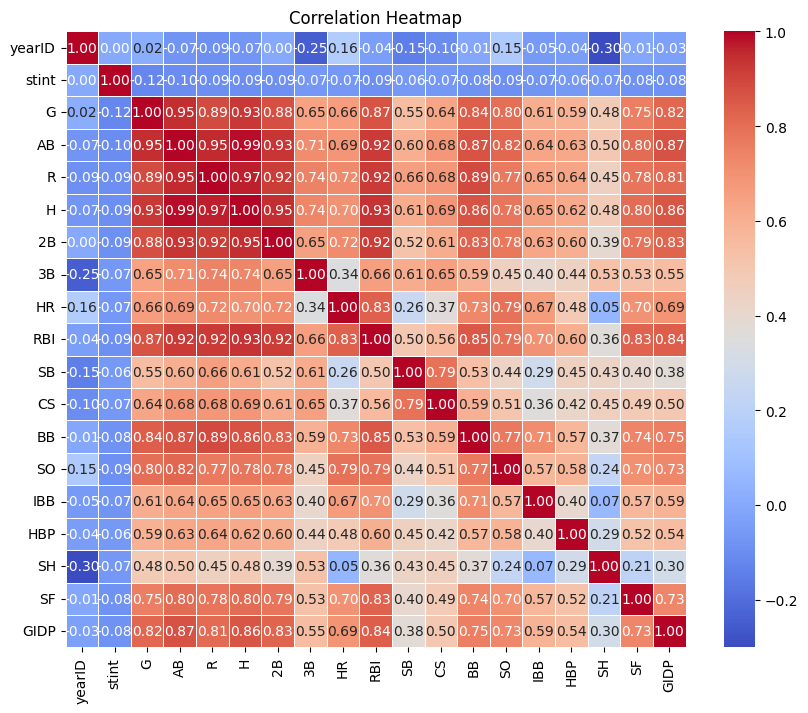

In [17]:
import seaborn as sb
import matplotlib.pyplot as plt

corr_matrix= Batting.corr(numeric_only=True)
plt.figure(figsize=(10, 8))  # Adjust figure size
sb.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()
